In [21]:
from fastai.vision.all import *


In [22]:
#Download data from paper

data_dir = Path("finland_bugs")

In [23]:
files = get_image_files(data_dir)
len(files)

15074

In [29]:
dataloaders = ImageDataLoaders.from_folder(path=data_dir, 
                                           valid_pct=0.2,
                                           bs=32,
                                           batch_tfms=aug_transforms(size=224, flip_vert=True))

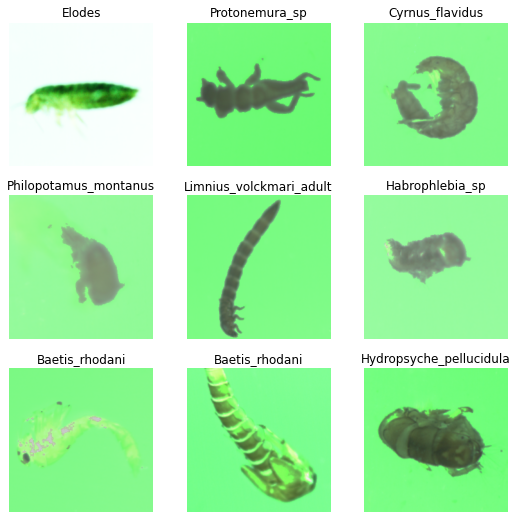

In [31]:
dataloaders.show_batch()

In [8]:
learn = cnn_learner(dataloaders, resnet50, metrics=error_rate)


SuggestedLRs(valley=0.0005754399462603033)

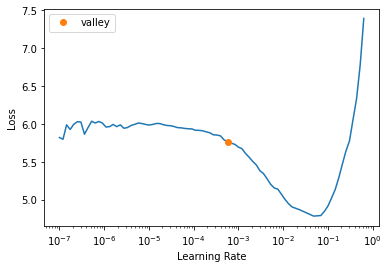

In [9]:
learn.lr_find()


In [10]:
learn.freeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.630592,0.945921,0.275382,01:14
1,1.013345,0.634386,0.198076,01:14


SuggestedLRs(valley=3.0199516913853586e-05)

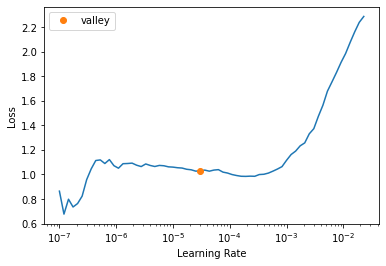

In [11]:
learn.unfreeze()
learn.lr_find()


In [12]:
learn.unfreeze()
learn.fit_one_cycle(2, 3e-5)


epoch,train_loss,valid_loss,error_rate,time
0,0.877946,0.693410,0.209688,01:34
1,0.642560,0.411489,0.125083,01:36


In [13]:
learn.unfreeze()
learn.fit_one_cycle(2, 3e-5)


epoch,train_loss,valid_loss,error_rate,time
0,0.615318,0.390083,0.120106,01:35
1,0.507086,0.320966,0.099536,01:36


SuggestedLRs(valley=0.00013182566908653826)

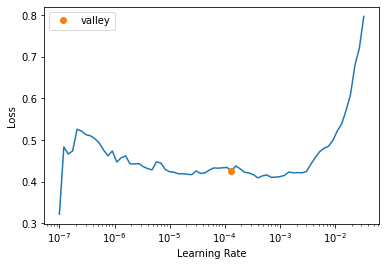

In [14]:
learn.freeze()
learn.lr_find()


In [15]:
learn.freeze()
learn.fit_one_cycle(2, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.445646,0.306125,0.093563,01:18
1,0.436301,0.298382,0.094891,01:18


In [17]:
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6, 1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.406210,0.287770,0.087591,01:34
1,0.411471,0.271707,0.084273,01:35
2,0.381549,0.267469,0.081619,01:35
3,0.316678,0.248531,0.073656,01:36


KeyboardInterrupt: 

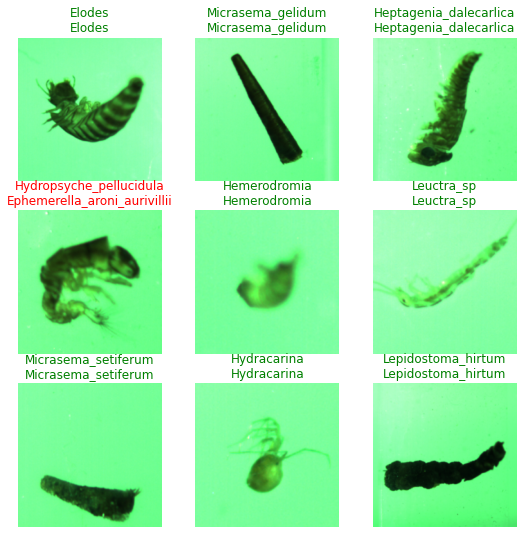

In [16]:
learn.show_results()
